# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.

In [50]:
import pandas as pd

df = pd.read_csv('./data/airbnb_hw.csv')

df['Price'] = pd.to_numeric(df['Price'].replace({',':''}, regex = True), errors='coerce')

  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.


In [51]:
print(df.shape)
df.info()
df.head()

(30478, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  int64  
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int6

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [52]:
pd.crosstab(df['Room Type'], df['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


While examining the cross tabulation of the variables 'Room Type' and 'Property Type'. There are several observations to be made. Most property types are evenly distributed among room types. Bed & Breakfasts and houses are listed as private rooms signficantly higher than entire home/apt. Condos and town houses are more likley to be listed as an enire property. There aren't many shared rooms but they most commonly appear in dorms or lofts. 

  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.


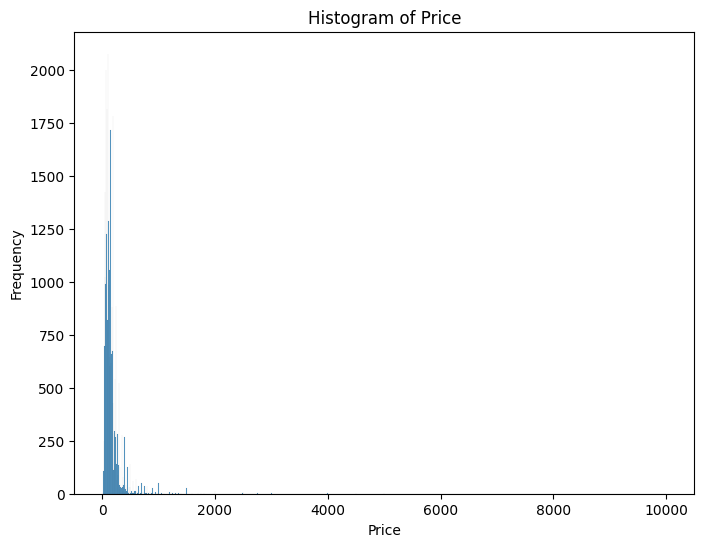

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Price
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=False)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

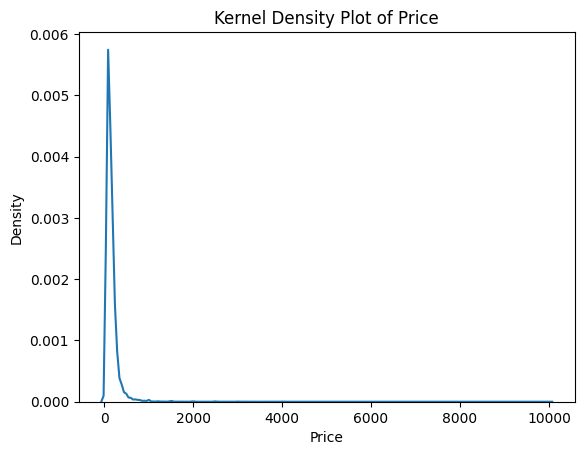

In [54]:
sns.kdeplot(df['Price'])
plt.title('Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

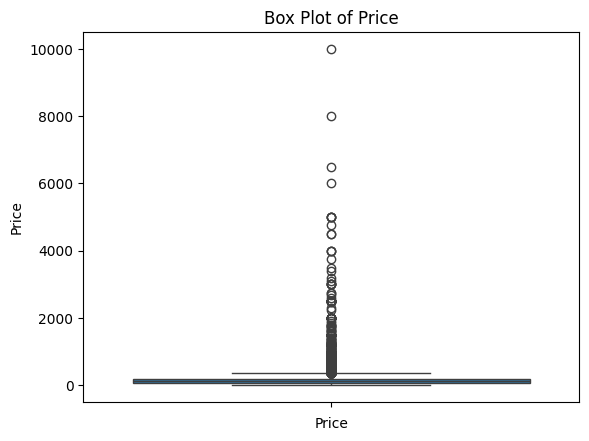

In [55]:
sns.boxplot(df['Price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

In [56]:
print(df['Price'].describe())

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


Examining these charts, the data is definitely badly scaled. There are many many bins across a wide range of prices, causing the histogram to appear very skinny and not very understandable. The same happens with the kernel density plot. The box of the boxplot isn't even visible with the number of outliers shown on the chart.

In [57]:
import numpy as np

df['price_log'] = np.log(df['Price'] + 1)

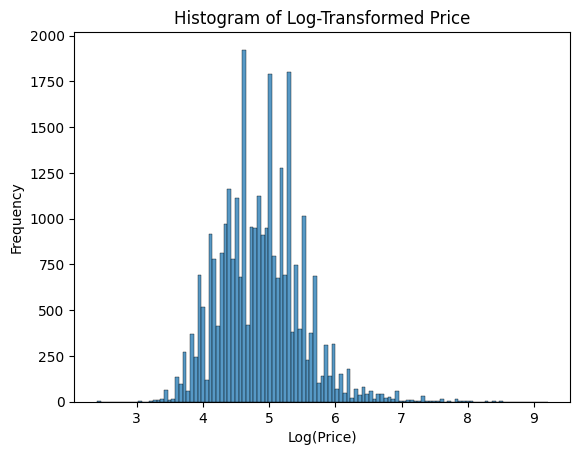

In [58]:
sns.histplot(df['price_log'])
plt.title('Histogram of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

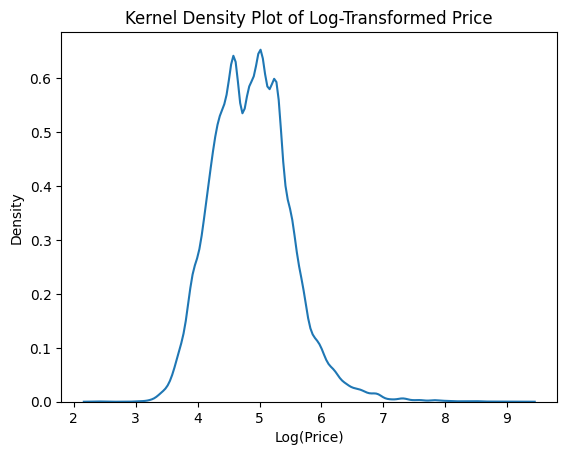

In [59]:
sns.kdeplot(df['price_log'])
plt.title('Kernel Density Plot of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Density')
plt.show()

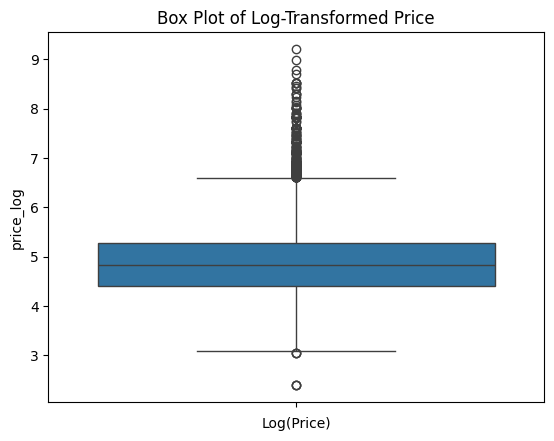

In [60]:
sns.boxplot(df['price_log'])
plt.title('Box Plot of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.show()

In [61]:
print(df['price_log'].describe())

count    30478.000000
mean         4.869699
std          0.622704
min          2.397895
25%          4.394449
50%          4.836282
75%          5.278115
max          9.210440
Name: price_log, dtype: float64


After using log to get the price_log variable, the charts are much more readable and the data is more appropriately scaled. It normalizes the distribution, making the histogram and kernel density plot much more understandable. Additionally, the box plot, while still containing many outliers, is much less impacted by these outliers. 

  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.


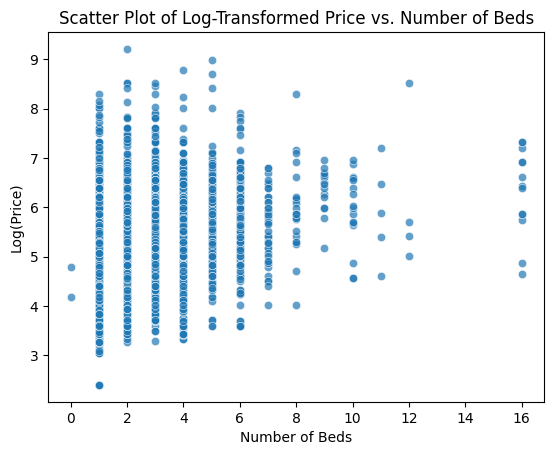

In [62]:
sns.scatterplot(data=df, x='Beds', y='price_log', alpha=0.7)
plt.title('Scatter Plot of Log-Transformed Price vs. Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.show()

In [63]:
df.loc[:,['Beds','Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

From this chart and description, it appears that as the number of beds increases, the price also increases. Once the number of beds hits about 8 beds, the trend becomes less apparently, likely due to outliers on the higher count of beds

  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

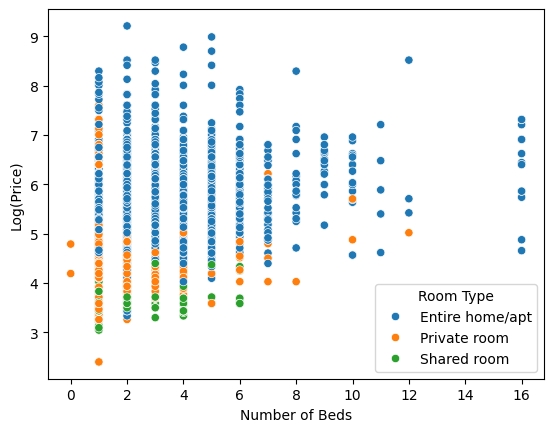

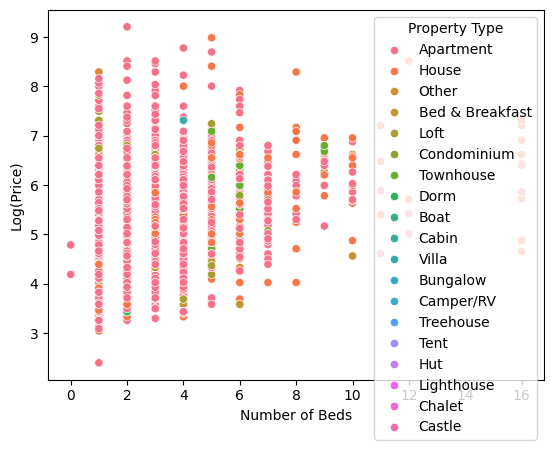

In [67]:
sns.scatterplot(data=df,x='Beds',y='price_log',hue='Room Type')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.show()

sns.scatterplot(data=df,x='Beds',y='price_log',hue='Property Type')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.show()

It appears that among property types with the same number entire properties are the more expensive and the private rooms and shared rooms are cheaper (with shared being slightly cheaper)

In [71]:
var = 'Price'
group = 'Room Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

In [70]:
var = 'Price'
group = 'Property Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

Among the room types, the entire home/apt has the highest price on average and also has the highest standard deviation, indicating a wide spread. Among the property types, the 'Other' category has the highest mean and standard deviation, followed by the Villa. The median for these variables is likely a more reliable estimate of central tendency because of the presence of many outliers in the data.

  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

Text(37.722222222222214, 0.5, 'Log(Price)')

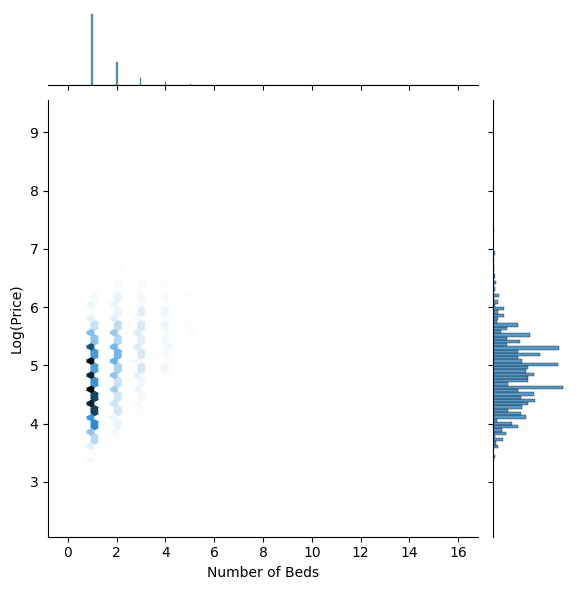

In [75]:
sns.jointplot(data=df,x='Beds',y='price_log',kind='hex')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')

The data is mostly distributed in the 1-5 bed range, with most properties in the 1-2 range. The data also falls mostly between the log(price) points, 3.5 to 6.5. This changes some things thought to be true about questions 4 and 5. There seemed to be a lot of odd looking charts perhaps due to outliers. However, this chart shows that the vast majority of data falls into the above range 

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.